<a href="https://colab.research.google.com/github/diagonal-hamiltonian/repodynamite/blob/master/Aaron_Miller_Hackathon_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Hackathon: using a CNN to catagorise if a slide has a logo or not  - Aaron Miller


### Mounting Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
 
BASE_DIR = '/content/drive/My Drive/Computer Vision/'

Mounted at /content/drive


### Load libraries

In [ ]:
import PIL
from PIL import Image
#import cv2
import os
import glob

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


### Building the Keras Model

In [ ]:
size = (320,240)
input_shape=(320,240,3)

model = Sequential()

#Using convolutional and pooling layers to extract useful features of the logos
model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#Flattening the tensor so we can use dense layers to preform the classification
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#Final dense layer to preform the classification with an associated probability
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 238, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 119, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 58, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 26, 64)        3

### Create generators to feed data to the model in batches
Loading the images into the notebook in batches.

In [ ]:
train_dir = os.path.join(BASE_DIR, 'Train/') # address for directory storing train data
test_dir = os.path.join(BASE_DIR, 'Test/') # address for directory storing test data

batch_size = 32
EPOCHS = 30

# this is the augmentation configuration we will use for training
# only rescaling
train_datagen = ImageDataGenerator(rescale=1./255,)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of img_dir, and indefinitely generate
# batches of image data
train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(size[0], size[1]),  # all images will be resized to target size
        batch_size=batch_size,
        class_mode='binary')  

# this is a similar generator, for test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(size[0], size[1]),
        batch_size=batch_size,
        class_mode='binary')


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Compile model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n // train_generator.batch_size #number of batch iterations before a training epoch is finished.
STEP_SIZE_VALID=test_generator.n // test_generator.batch_size 

### Train model

In [ ]:
history=model.fit_generator(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=18,
                         validation_data=test_generator,
                         validation_steps=30)

Epoch 1/18
125/125 [==============================] - 62s 494ms/step - loss: 0.6210 - accuracy: 0.7215 - val_loss: 0.5023 - val_accuracy: 0.7729
Epoch 2/18
125/125 [==============================] - 62s 498ms/step - loss: 0.4562 - accuracy: 0.8183 - val_loss: 0.3277 - val_accuracy: 0.8750
Epoch 3/18
125/125 [==============================] - 61s 489ms/step - loss: 0.3910 - accuracy: 0.8450 - val_loss: 0.4110 - val_accuracy: 0.8448
Epoch 4/18
125/125 [==============================] - 61s 489ms/step - loss: 0.3385 - accuracy: 0.8695 - val_loss: 0.4084 - val_accuracy: 0.8542
Epoch 5/18
125/125 [==============================] - 61s 488ms/step - loss: 0.3470 - accuracy: 0.8648 - val_loss: 0.3236 - val_accuracy: 0.8906
Epoch 6/18
125/125 [==============================] - 61s 486ms/step - loss: 0.3456 - accuracy: 0.8600 - val_loss: 0.2168 - val_accuracy: 0.9333
Epoch 7/18
125/125 [==============================] - 62s 495ms/step - loss: 0.2104 - accuracy: 0.9255 - val_loss: 0.1265 - val_ac

### Performance summary on Test data


In [ ]:
# evaluate the keras model on test data
STEP_SIZE_TEST=test_generator.n // test_generator.batch_size
score = model.evaluate_generator(generator=test_generator, steps=STEP_SIZE_TEST)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05788454785943031
Test accuracy: 0.9818548560142517


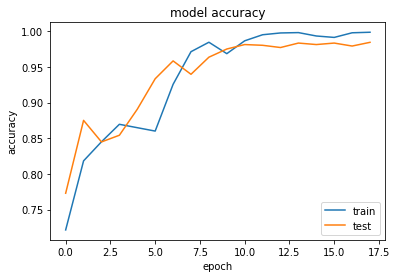

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


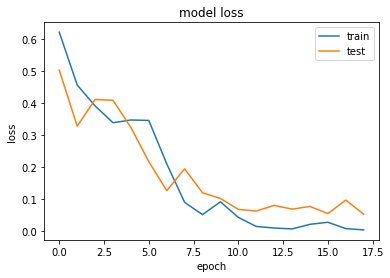

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Performance summary on Validation data


In [ ]:
val_dir = os.path.join(BASE_DIR, 'Validation/') # path to validation directory

val_datagen = ImageDataGenerator(rescale=1./255) # preprocessing generator
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(size[0], size[1]), 
                                                class_mode='binary',
                                                shuffle = False,
                                                batch_size=5)

filenames = val_generator.filenames
nb_samples = len(filenames)

y_true_labels = val_generator.classes # true image classes
predictions = model.predict_generator(val_generator, verbose=1) # model predicitons

val_generator.class_indices

Found 500 images belonging to 2 classes.
100/100 [==============================] - 6s 63ms/step


{'Logo': 0, 'No_Logo': 1}

In [ ]:
 # percentage in each class
 pd.Series(val_generator.classes).value_counts()*100/500

1    69.2
0    30.8
dtype: float64

In [ ]:
# evaluate the keras model on unseen data
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
score = model.evaluate_generator(generator=val_generator, steps=STEP_SIZE_VALID)

print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.040161099284887314
Validation accuracy: 0.9860000014305115


In [ ]:
# classification report

y_prediction = [np.round(pred) for pred in predictions]
print(accuracy_score(y_true=list(y_true_labels), y_pred=y_prediction))
print(classification_report(y_true=list(y_true_labels), y_pred=y_prediction))


0.986
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       154
           1       0.98      1.00      0.99       346

    accuracy                           0.99       500
   macro avg       0.99      0.98      0.98       500
weighted avg       0.99      0.99      0.99       500



### Predictions on Unlabelled Data

*   A probability of 1 means that model thinks there is a slide present
*   A probability of 0 means that model thinks there is no slide present





In [ ]:
size = (320,240)

unseen_dir = os.path.join(BASE_DIR, 'Unseen Slides/') # path to unseen directory

unseen_datagen = ImageDataGenerator(rescale=1./255) # preprocessing generator
unseen_generator = unseen_datagen.flow_from_directory(unseen_dir,
                                                target_size=(size[0], size[1]), 
                                                class_mode=None,
                                                shuffle = False,
                                                batch_size=1)
filenames = unseen_generator.filenames
unseen_generator.reset()

predictions = model.predict_generator(unseen_generator, verbose=1) # model predicitons
predictions_df = pd.DataFrame({"SlideName": filenames, "pr": np.round(1.- predictions[:,0], 3)})

predictions_df.sort_values('SlideName').to_csv('/content/drive/My Drive/'+ 'predictions986.csv')
predictions_df.sort_values('SlideName').head(20)

Found 500 images belonging to 1 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
500/500 [==============================] - 172s 344ms/step


,SlideName,pr
0,Unlabelled/Slide1.PNG,0.0
1,Unlabelled/Slide10.PNG,0.0
2,Unlabelled/Slide100.PNG,0.0
3,Unlabelled/Slide101.PNG,0.0
4,Unlabelled/Slide102.PNG,0.0
5,Unlabelled/Slide103.PNG,0.0
6,Unlabelled/Slide104.PNG,0.0
7,Unlabelled/Slide105.PNG,1.0
8,Unlabelled/Slide106.PNG,1.0
9,Unlabelled/Slide107.PNG,0.0


# Saving and loading model's

In [ ]:
#!ls '/content/drive/My Drive/Colab Notebooks'


In [ ]:
#model.save('/content/drive/My Drive/Colab Notebooks/A98.6')

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/A98.6')